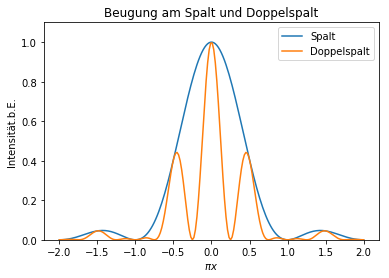

In [4]:
%matplotlib inline     # Aufgabe 2 
import matplotlib.pyplot as plt 
import numpy as np 

# Beugungsfunktion Spalt 
def beugung_spalt(x):
    return np.sinc(x)**2

# Beugungsfunktion Doppelspalt 
def beugung_dspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

# Anzahl der Nebenmaxima, die dargestellt werden sollen 
a=1
# Verhältnis Spaltabstand zu Spaltbreite 
v=2

x=np.linspace(-(a+1), a+1,200)
plt.plot(x,beugung_spalt(x), label = "Spalt")
plt.plot(x,beugung_dspalt(x), label = "Doppelspalt")
plt.xlabel ("$\pi x$")
plt.ylabel("Intensität.b.E.")
plt.title("Beugung am Spalt und Doppelspalt")
plt.ylim((0,1.1))
plt.legend()

In [5]:
%matplotlib inline                        # Aufgabe 1 (zusammen mit der ganzen Gruppe gemacht im Versuch)
import matplotlib.pyplot as plt           # Jonas Werk 
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [6]:
ordnung_maxima = np.arange(6)
lage_maxima = np.array([1008.97, 913.61, 841.87, 773.35, 707.35, 637.56])
ordnung_minima = np.arange(5) + 1
lage_minima = np.array([939.07, 872.14, 805.30, 736.35, 668.73])
abstand_maxima = lage_maxima[0] - lage_maxima
abstand_minima = lage_maxima[0] - lage_minima
fehler_abstand = np.sqrt(2*10**2)

In [7]:
def gerade(x, m, c):
    return m*x+c
popt, pcov = curve_fit(gerade, ordnung_minima, abstand_minima)

Steigung der Geraden:  67.64700000014537  +-  0.22197551787782452
0 .tes Maximum bei n =  1.3843777255428504  +-  0.20939020438650577
1 .tes Maximum bei n =  2.4448829955451545  +-  0.20949459134505635
2 .tes Maximum bei n =  3.4577882241562197  +-  0.2096481833097044
3 .tes Maximum bei n =  4.433441246461099  +-  0.20984580172020034
4 .tes Maximum bei n =  5.46512040444076  +-  0.2101076373118053


Text(0.5, 0, 'Beugungsordnung der Minima')

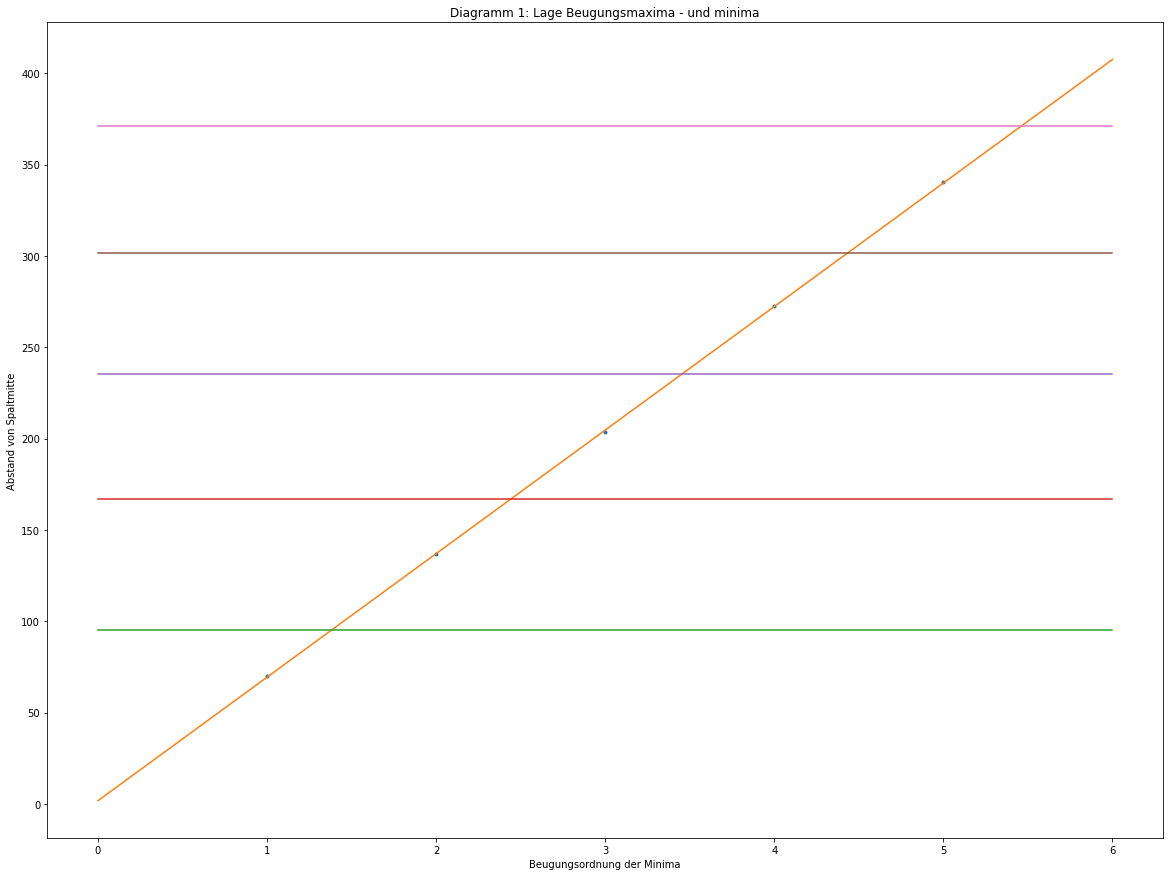

In [8]:
plt.figure(figsize=(20,15))

figure = plt.plot(ordnung_minima, abstand_minima, '.')
plt.plot(np.arange(7), gerade(np.arange(7), *popt))
print('Steigung der Geraden: ', popt[0], ' +- ', np.sqrt(pcov[0][0]))

for i in range(len(abstand_maxima)-1):
    n = i + 1
    plt.plot(np.arange(7), gerade(np.arange(7), 0, abstand_maxima[n]))
    ordnung_diagram = (abstand_maxima[n]- popt[1])/popt[0]
    TF1 = fehler_abstand/popt[0]
    TF2 = np.sqrt(pcov[1][1])/popt[0]
    TF3 = (abstand_maxima[n]- popt[1])*np.sqrt(pcov[0][0]) /popt[0]**2
    fehler_ordnung = np.sqrt(TF1**2+TF2**2+TF3**2)
    print(i, '.tes Maximum bei n = ', ordnung_diagram, ' +- ', fehler_ordnung)
    i =+ 1
    
plt.title('Diagramm 1: Lage Beugungsmaxima - und minima')
plt.ylabel('Abstand von Spaltmitte')
plt.xlabel('Beugungsordnung der Minima')

[1.         0.07890711 0.04764074 0.02698052 0.01540195 0.01052992]
[0.05332149 0.01536801 0.00717866 0.00414167 0.00269171]


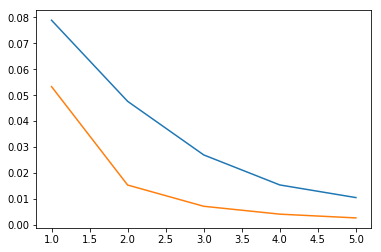

In [9]:
v0 = (410.9-105) / (3981.71-105) #verhältnis nulltes erstes maximum ~ zu Aufgabe 1 
m1 = 3996.73-105
intensitäten_relativ = np.array([1, v0, v0*(2454.66-105)/m1, v0*(1435.69-105)/m1, v0*(864.63-105)/m1, v0*(624.34-105)/m1])
ordnung = np.arange(6)
theoretische_intensität_relativ = (np.sin( np.pi*(ordnung[1:]+0.5)**2)/((np.pi * ordnung[1:]+0.5))**2)
print(intensitäten_relativ)
print(theoretische_intensität_relativ)
plt.plot(ordnung[1:], intensitäten_relativ[1:])
plt.plot(ordnung[1:], theoretische_intensität_relativ)